## 6.6. Analyze time series data

## Table of contents:
### 1. Import libraries and dataset
### 2. Dataset subsetting and wrangling
### 3. Time-series analysis: decomposition and autocorrelation
### 4. Stationarize the time series data
##

### 1. Import libraries and dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings
warnings.filterwarnings('ignore') 
plt.style.use('fivethirtyeight')

In [2]:
# Create path
path = r'C:\Users\marta\OneDrive\Documents\A6 Personal Project'

In [3]:
# Import dataset
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'emissions_temp_pop_country_modified.pkl'))

In [4]:
# Check output
df.head()

,country,country_code,agriculture_prod_stage,year,temp_change,total_population,emissions_CH4,emissions_CO2,emissions_N2O,population_category,total_emissions
0,Afghanistan,4,Domestic Wastewater,2002,1.365,21000.256,28.870985,141.322891,0.411351,Low population,170.605227
1,Afghanistan,4,Domestic Wastewater,2003,0.587,22645.130,30.250737,141.322891,0.440623,Low population,172.014251
2,Afghanistan,4,Domestic Wastewater,2004,1.373,23553.551,31.586700,141.322891,0.465987,Low population,173.375578
3,Afghanistan,4,Domestic Wastewater,2005,0.401,24411.191,32.771628,141.322891,0.468327,Low population,174.562846
4,Afghanistan,4,Domestic Wastewater,2006,1.720,25442.944,33.766473,141.322891,0.482093,Low population,175.571457


In [5]:
# Check shape
df.shape

(35780, 11)

In [6]:
# Check frequency distribution for year column
df['year'].value_counts()

year
2015    1811
2010    1807
2013    1807
2014    1807
2007    1806
2011    1803
2012    1800
2017    1797
2018    1793
2016    1790
2019    1789
2006    1788
2009    1785
2008    1783
2020    1782
2021    1775
2003    1771
2004    1769
2005    1766
2002    1751
Name: count, dtype: int64

In [7]:
# Export dataframe as csv file
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'emissions_temp_pop_country_modified.csv'))

### 2. Dataset subsetting and wrangling

In [8]:
# Create a subset dataframe with only two columns
df_sub = df.filter(['year', 'total_emissions'], axis = 1)

In [9]:
# Check output
df_sub

,year,total_emissions
0,2002,170.605227
1,2003,172.014251
2,2004,173.375578
3,2005,174.562846
4,2006,175.571457
...,...,...
35995,2017,159.184135
35996,2018,159.321851
35997,2019,159.413223
35998,2020,159.498430


In [10]:
# Group data by year
df_grouped = df_sub.groupby('year').agg({'total_emissions': ['sum']})

In [11]:
# Check the result
df_grouped.head(3)

,total_emissions
,sum
year,
2002,2.474324e+06
2003,2.567999e+06
2004,2.685016e+06


In [12]:
# Join multiindex into one index
df_grouped.columns = [' '.join(col).strip() for col in df_grouped.columns.values]

In [13]:
# Flatten the index at all levels
df_grouped = pd.DataFrame(df_grouped.to_records())

In [14]:
# Check the output
df_grouped

,year,total_emissions sum
0,2002,2.474324e+06
1,2003,2.567999e+06
2,2004,2.685016e+06
3,2005,2.765671e+06
4,2006,2.857756e+06
5,2007,2.962906e+06
6,2008,2.994228e+06
7,2009,2.985044e+06
8,2010,3.108832e+06
9,2011,3.186286e+06


In [15]:
# Check the data type
df_grouped['year'].dtype

dtype('int64')

In [16]:
# Changing data type of 'year' column
df_grouped['year'] = df_grouped['year'].astype('str')

In [17]:
# Check the result
df_grouped['year'].dtype

dtype('O')

In [18]:
# Set the 'year' column as the index
from datetime import datetime

df_grouped['datetime'] = pd.to_datetime(df_grouped['year']) # Create a datetime column from 'year'
df_grouped = df_grouped.set_index('datetime') # Set the datetime as the index of the dataframe
df_grouped.drop(['year'], axis=1, inplace=True) # Drop the "year" column
df_grouped.head()

,total_emissions sum
datetime,
2002-01-01,2.474324e+06
2003-01-01,2.567999e+06
2004-01-01,2.685016e+06
2005-01-01,2.765671e+06
2006-01-01,2.857756e+06


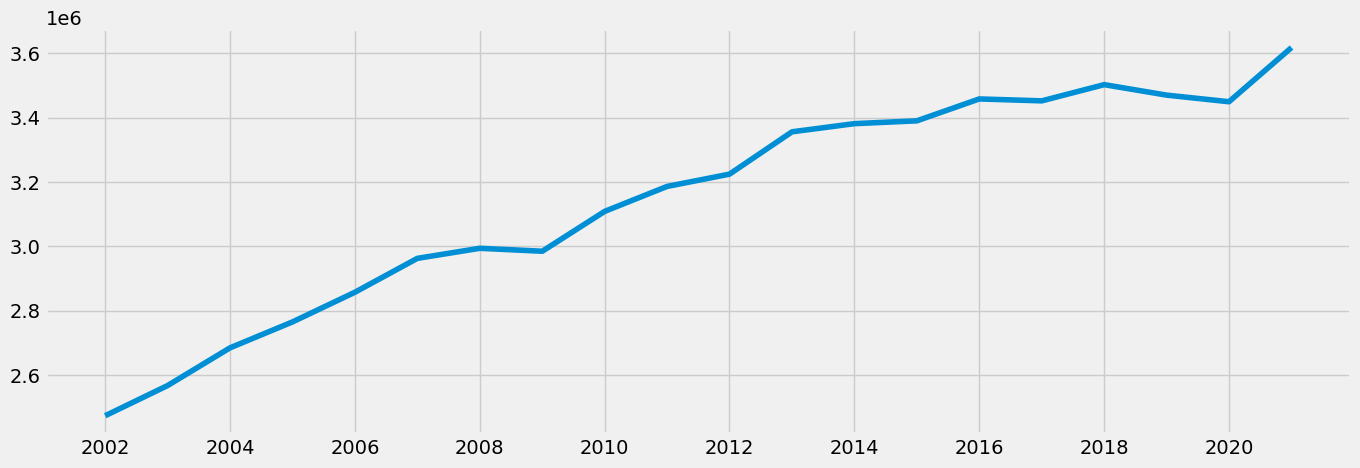

In [19]:
# Create a line chart for df_sub
plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_grouped)

### 3. Time-series analysis: decomposition and autocorrelation

In [20]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_grouped, model='additive')

In [21]:
# Define a fixed size for all special charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

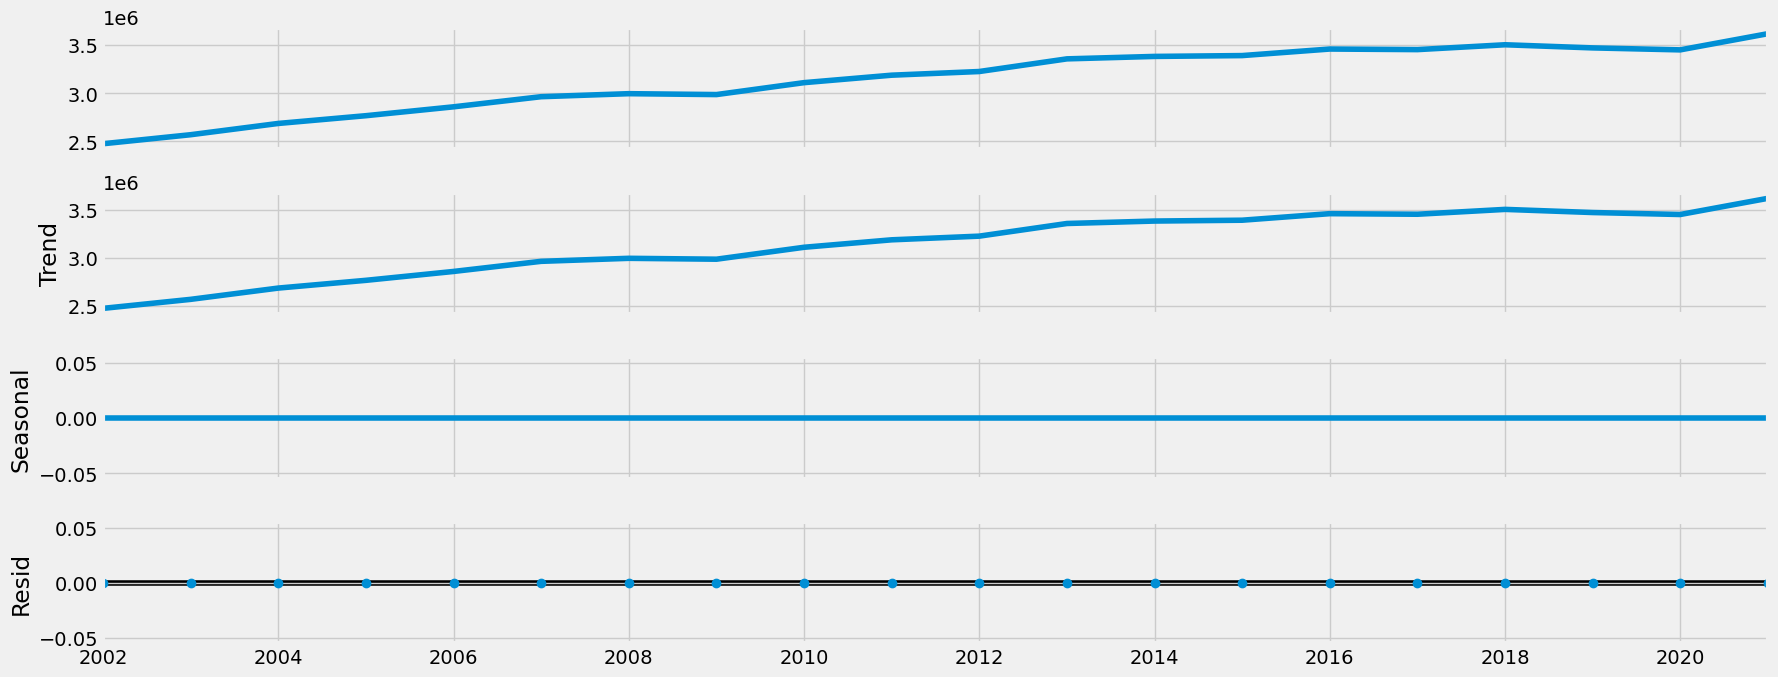

In [22]:
# Plot the separate components
decomposition.plot()
plt.show()

The level and trend lines are the same, as the data is smoothed (displays the values measured yearly). The trend goes up starting from 2002 with small fluctuations in some years. <br>
There is no seasonality in this time series, as the line is just horizontal, whithout any ups and downs. This makes sense, as the emissions level might variate throught the year, but doesn't have seasonal pattern across the years. <br>
Also, there is no unexplained noise, as the residual points are pretty much linear. <br><br>
Trend is one of the characteristics of non-stationarity. 

In [23]:
# The adfuller() function will import from the model from statsmodels for the test
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function
# Define a function that prints the correct output from that array
def dickey_fuller(timeseries): 
# Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_grouped['total_emissions sum'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.968889
p-value                         0.764442
Number of Lags Used             8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


Null hypothesis: unit root is present, meaning the data is non-stationary. <br>
p-value is more than 0.05, so the test result is statistically insignificant. <br>
Test Statistic (-0.97) is higher than the Critical Value with a 5% significance level (-3.19), so the null hypothesis cannot be rejected. 

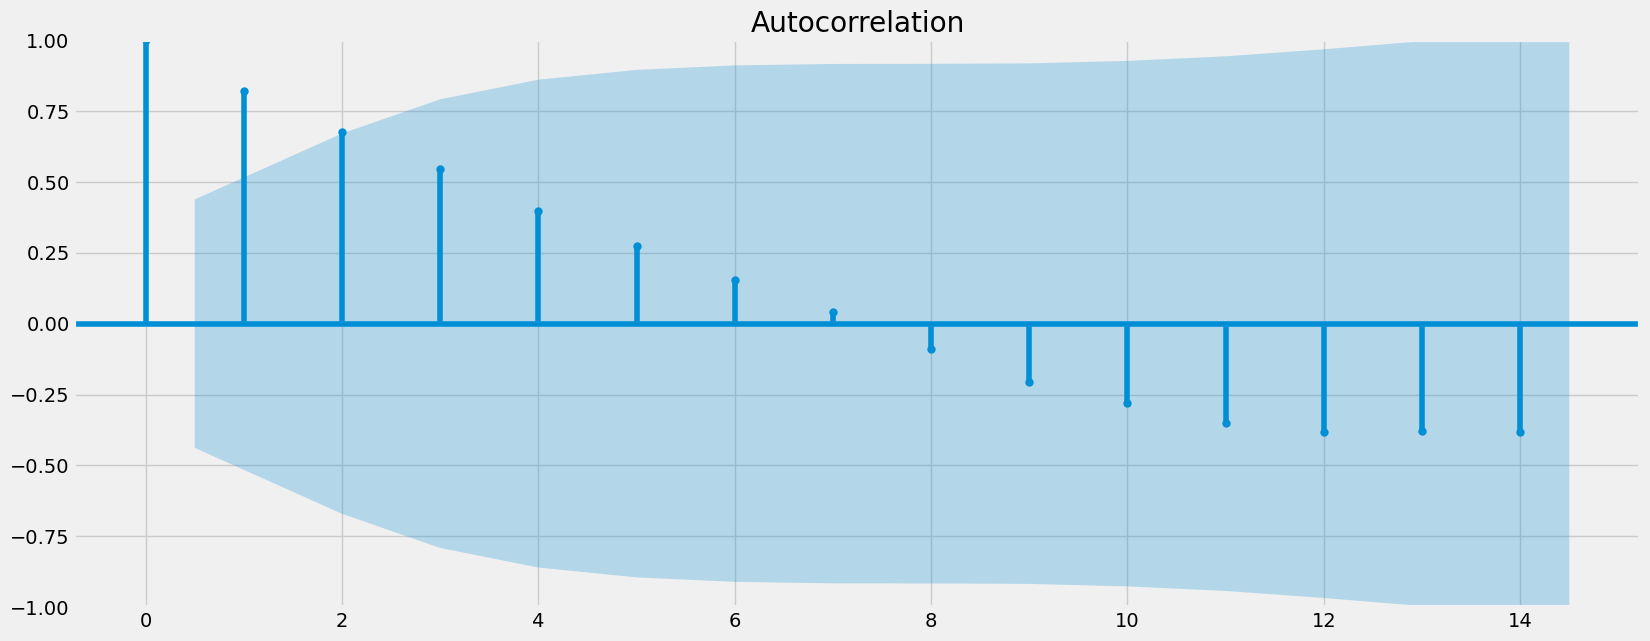

In [24]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(df_grouped)
plt.show()

There are only 3 autocorrelated lags that go above the confidence interval.

### 4. Stationarize the time series data

### -- Differencing

In [25]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff = df_grouped - df_grouped.shift(1) 

In [26]:
# Remove the missing values that came about as a result of the differencing
# You need to remove these or you won't be able to run the Dickey-Fuller test
data_diff.dropna(inplace = True)

In [27]:
# Check the result
data_diff.head()

,total_emissions sum
datetime,
2003-01-01,93675.601623
2004-01-01,117016.094931
2005-01-01,80655.212446
2006-01-01,92084.794333
2007-01-01,105150.307436


In [28]:
data_diff.columns

Index(['total_emissions sum'], dtype='object')

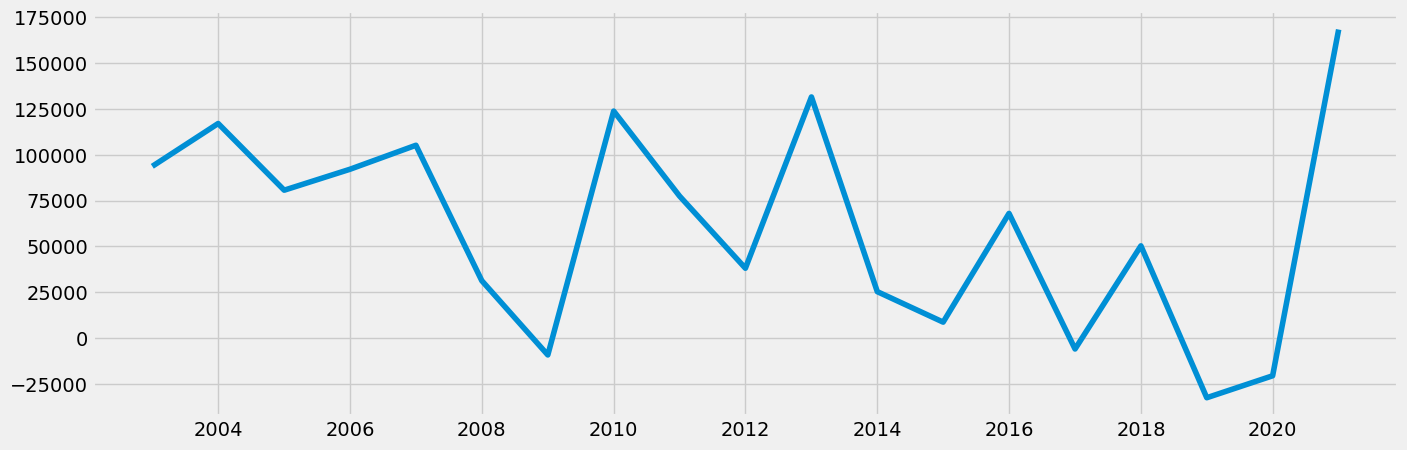

In [29]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [30]:
# Run Dickey-Fuller test again
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  0.553440
p-value                         0.986410
Number of Lags Used             6.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


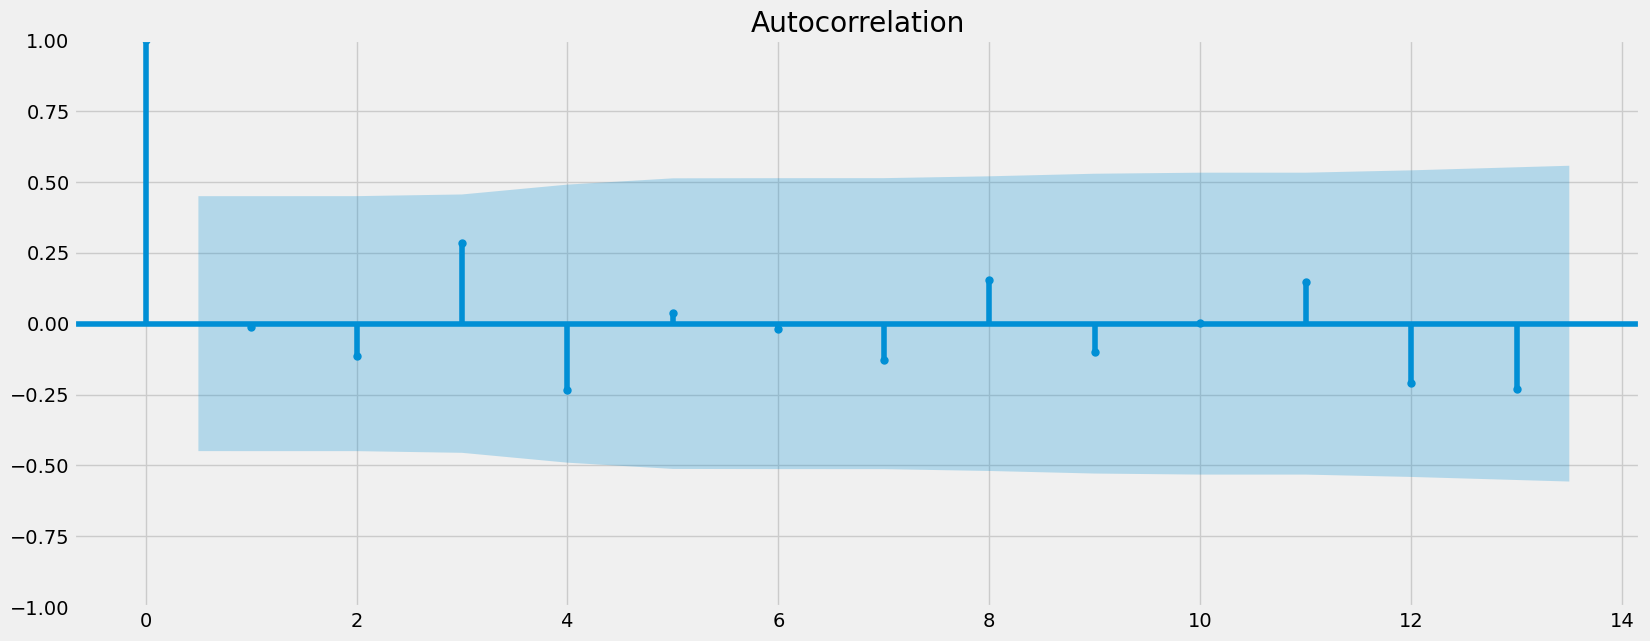

In [31]:
# Check autocorrelation again
plot_acf(data_diff)
plt.show()

### -- Differencing (second round)

In [32]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff_2 = data_diff - data_diff.shift(1)

In [33]:
# Remove the missing values that came about as a result of the differencing
# You need to remove these or you won't be able to run the Dickey-Fuller test
data_diff_2.dropna(inplace = True)

In [34]:
# Check the result
data_diff_2.head()

,total_emissions sum
datetime,
2004-01-01,23340.493308
2005-01-01,-36360.882485
2006-01-01,11429.581887
2007-01-01,13065.513103
2008-01-01,-73827.978386


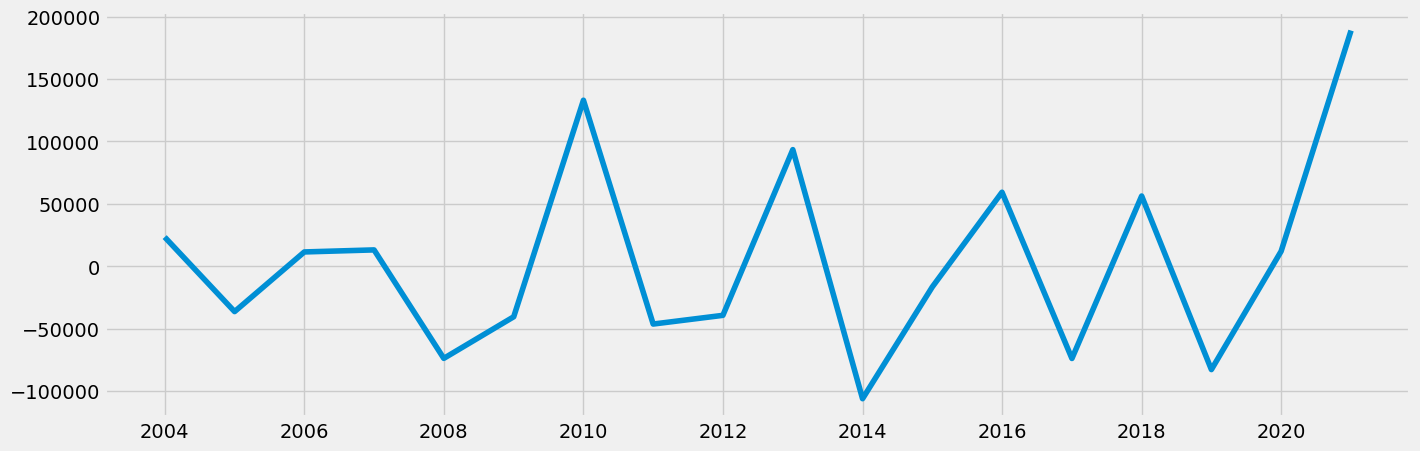

In [35]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [36]:
# Run Dickey-Fuller test again
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.133276
p-value                         0.024187
Number of Lags Used             5.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


p-values now is less than 0.5%, and Test Statistic is slightly smaller than Critical Value (10%). So, with 90% confidence level, we can say that the time series is stationary now.

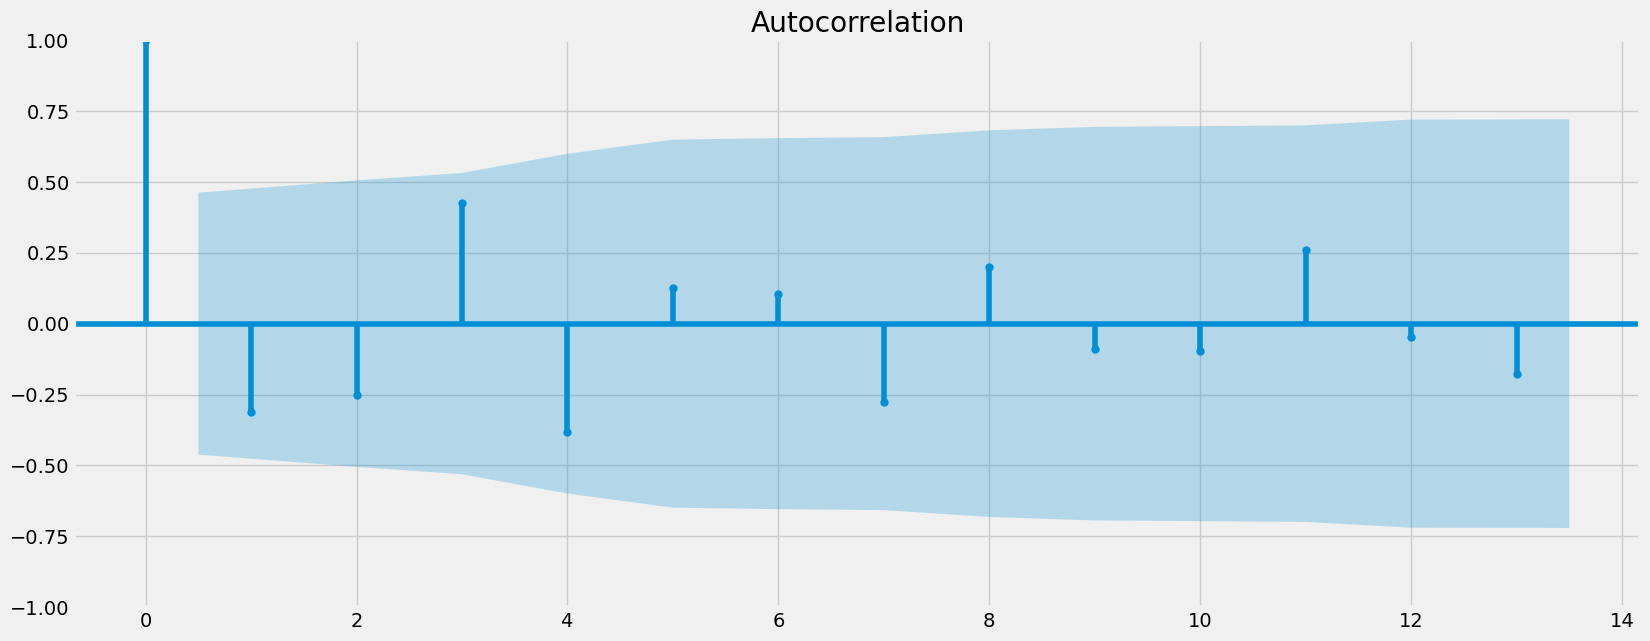

In [37]:
# Check autocorrelation again
plot_acf(data_diff_2)
plt.show()